# Dataset Exploration ($\Omega_b, \Omega_{cdm}, \tau, n_s, A_s, H_0, \Omega_K; \theta_*$)

In [2]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
# means Planck 2018 ------------------

omg_b = 0.0224  # this is actually Omg_b*(h^2). 0.015-0.03
omg_cdm = 0.120 # this is actually Omg_cdm*(h^2)          0.05-0.2

# no theta_star   
tau = 0.054
n_s = 0.965
A_s = 2.0968e-9
omg_k=0.001 # -0.2 +0.2   

h = 67.4/100  # 30- 120

# sigmas Planck 2018 ----- 


sigma_omg_b = 0.0001    #
sigma_omg_cdm = 0.001   #      
sigma_tau = 0.007
sigma_n_s = 0.004
sigma_A_s = 2.9e-11
sigma_omg_k = 0.002

sigma_h = 0.5/100

PLANCK2018_CLASS_names = ['omega_b', 'omega_cdm', 'tau_reio', 'n_s', 'A_s', 'h', 'Omega_k']
PLANCK2018_means = [omg_b, omg_cdm, tau, n_s, A_s, h, omg_k]
PLANCK2018_sigmas = [sigma_omg_b, sigma_omg_cdm, sigma_tau, sigma_n_s, sigma_A_s, sigma_h, sigma_omg_k]  
                
PLANCK2018_params = [[i,j,k] for i,j,k in zip(PLANCK2018_CLASS_names, PLANCK2018_means, PLANCK2018_sigmas)]


In [ ]:
[0.0224, 0.12, 0.054, 0.965, 2.0968e-09, 0.674, 0.001]
['omega_b', 'omega_cdm', 'tau_reio', 'n_s', 'A_s', 'h', 'Omega_k']

[0.0224, 0.12, 0.054, 0.965, 2.0968e-09, 0.674, 0.001]

In [4]:
def parameter_instances(param_central, param_range, N):
    param_arr = np.linspace(param_central-param_range, param_central+param_range , N)
    return param_arr

In [5]:
def data_set_generator(param_select=[0,0,0,0,0,0,0], param_range=3, N=10, BESTFIT_params=PLANCK2018_params, title_str=""):
    # param_select: list of 0/1 to indicate which parameter to vary FOR NOW JUST ONE
    
    #set array of varying param
    for i, value in enumerate(param_select):
        if value == 1:
            selected_param_name = BESTFIT_params[i][0]
            mean = BESTFIT_params[i][1]
            sigma = BESTFIT_params[i][2]
            selected_param_arr = parameter_instances(mean, param_range*sigma, N)
            break
        else:
            pass

    rows = []
    count = 0
    for values in selected_param_arr:
        cosmo = Class()
        params = {
            'omega_b': BESTFIT_params[0][1],
            'omega_cdm': BESTFIT_params[1][1],
            # no theta_star
            'tau_reio': BESTFIT_params[2][1],
            'n_s': BESTFIT_params[3][1],
            'A_s': BESTFIT_params[4][1],

            'h': BESTFIT_params[5][1],
            'Omega_k': BESTFIT_params[6][1],     #we assume =0 for now
            
            'output': 'tCl',      # we only need derived params like theta_s; this is lightweight
            # optional precision tweaks
            'l_max_scalars': 500
        }
        params[selected_param_name] = values # iterate over the varying param 



        # Compute cosmology
        cosmo.set(params)
        cosmo.compute()

        # Get theta_star CLASS exposes derived params in a dict.
        derived = cosmo.get_current_derived_parameters(['100*theta_s'])
        # Common keys: '100*theta_s' or 'theta_s'. Use whichever exists.
        theta100 = derived['100*theta_s']

        rows.append((values, theta100))

        cosmo.struct_cleanup()   # free internal structures (recommended)
        cosmo.empty()            # free memory
        count += 1
        print(count/N*100, "% completed", end='\r')

    # write CSV
    out_csv = title_str + str(selected_param_name)+"_theta_s"+str(param_range)+'_N'+str(N)+".csv"
    with open(out_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([str(selected_param_name), '100*theta_s'])
        for r in rows:
            writer.writerow(r)

    print(f"Saved {len(rows)} rows to {out_csv}")

### Dataset ($\Omega_b$,  $\theta_*$) 

In [6]:
data_set_generator([1,0,0,0,0,0,0], 5, 50)

Saved 50 rows to omega_b_theta_s5_N50.csv


-----
### sigmas --> ( parameter_range_start, ..._end )

In [7]:
def parameter_instances2(param_central, param_range_start, param_range_end, N):
    param_arr = np.linspace(param_range_start, param_range_end , N)
    return param_arr

In [8]:
def data_set_generator2( param_range_start, param_range_end, param_select=[0,0,0,0,0,0,0], N=10, BESTFIT_params=PLANCK2018_params, title_str=""):
    # param_select: list of 0/1 to indicate which parameter to vary FOR NOW JUST ONE
    
    #set array of varying param
    for i, value in enumerate(param_select):
        if value == 1:
            selected_param_name = BESTFIT_params[i][0]
            mean = BESTFIT_params[i][1]
            sigma = BESTFIT_params[i][2]
            selected_param_arr = parameter_instances2(mean,param_range_start, param_range_end, N)
            break
        else:
            pass

    rows = []
    count = 0
    for values in selected_param_arr:
        cosmo = Class()
        params = {
            'omega_b': BESTFIT_params[0][1],
            'omega_cdm': BESTFIT_params[1][1],
            # no theta_star
            'tau_reio': BESTFIT_params[2][1],
            'n_s': BESTFIT_params[3][1],
            'A_s': BESTFIT_params[4][1],

            'h': BESTFIT_params[5][1],
            'Omega_k': BESTFIT_params[6][1],     #we assume =0 for now
            
            'output': 'tCl',      # we only need derived params like theta_s; this is lightweight
            # optional precision tweaks
            'l_max_scalars': 500
        }
        params[selected_param_name] = values # iterate over the varying param 



        # Compute cosmology
        cosmo.set(params)
        cosmo.compute()

        # Get theta_star CLASS exposes derived params in a dict.
        derived = cosmo.get_current_derived_parameters(['100*theta_s'])
        # Common keys: '100*theta_s' or 'theta_s'. Use whichever exists.
        theta100 = derived['100*theta_s']

        rows.append((values, theta100))

        cosmo.struct_cleanup()   # free internal structures (recommended)
        cosmo.empty()            # free memory
        count += 1
        print(count/N*100, "% completed", end='\r')

    # write CSV
    out_csv = title_str + str(selected_param_name)+"_theta_s"+str(param_range_start)+'_'+str(param_range_end)+'_N'+str(N)+".csv"
    with open(out_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow([str(selected_param_name), '100*theta_s'])
        for r in rows:
            writer.writerow(r)

    print(f"Saved {len(rows)} rows to {out_csv}")

In [58]:
data_set_generator2(0.015, 0.03, [1,0,0,0,0,0,0], 50)

Saved 50 rows to omega_b_theta_s0.015_0.03_N50.csv


In [ ]:
data_set_generator2(0.05, 0.2, [0,1,0,0,0,0,0], 50)  # omg_cdm*(h^2) 0.05-0.2

In [73]:
data_set_generator2(30/100, 120/100, [0,0,0,0,0,1,0], 50)   # H 30- 120

Saved 50 rows to h_theta_s0.3_1.2_N50.csv


In [24]:
data_set_generator2(-0.005, 0.1, [0,0,0,0,0,0,1], 50)  # omg_k -0.2 +0.2   bu only -0.005 to 0.2 possible?

Saved 50 rows to Omega_k_theta_s-0.005_0.1_N50.csv


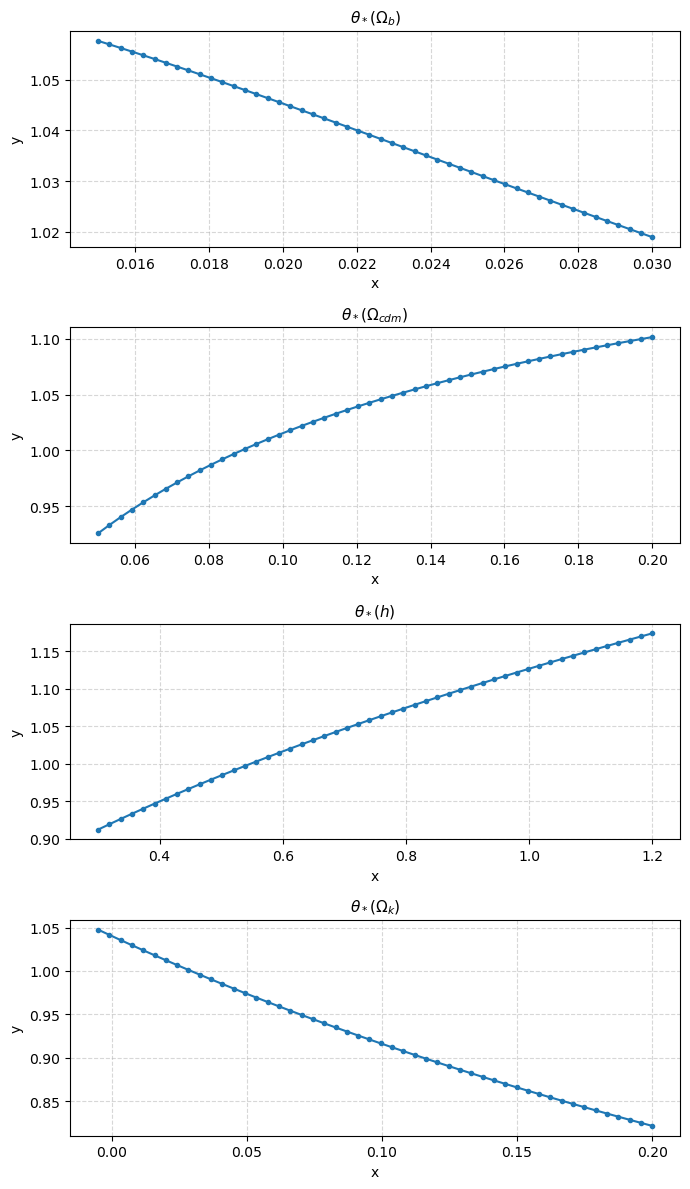

In [94]:
import pandas as pd

df_iOoooOO = pd.read_csv('omega_b_theta_s0.015_0.03_N50.csv')
df_OioooOO = pd.read_csv('omega_cdm_theta_s0.05_0.2_N50.csv')
df_OOoooiO = pd.read_csv('h_theta_s0.3_1.2_N50.csv')
df_OOoooOi = pd.read_csv('Omega_k_theta_s-0.005_0.2_N50.csv')

# Create figure and subplots (no shared x-axis)
fig, axes = plt.subplots(4, 1, figsize=(7, 12))

# List of (DataFrame, title)
datasets = [
    (df_iOoooOO, r'$\theta_*(\Omega_b)$'),  
    (df_OioooOO, r'$\theta_*(\Omega_{cdm})$'),  
    (df_OOoooiO, r'$\theta_*(h)$'),  
    (df_OOoooOi, r'$\theta_*(\Omega_k)$'),  
]

# Plot each dataset
for ax, (df, title) in zip(axes, datasets):
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o', markersize=3)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

fig.savefig("theta_star_dependence.png", dpi=300, bbox_inches='tight')
plt.show()

-----

### Datasets 1v1 ($\Omega_b$, $\Omega_c$,  $\tau$ , $n_s$, $A_s$, $h$, $\Omega_k$;  $\theta_*$)

In [ ]:
# I already generate these datasets
data_set_generator([1,0,0,0,0,0,0], 5, 50)
data_set_generator([0,1,0,0,0,0,0], 5, 50)
data_set_generator([0,0,1,0,0,0,0], 5, 50)
data_set_generator([0,0,0,1,0,0,0], 5, 50)
data_set_generator([0,0,0,0,1,0,0], 5, 50)
data_set_generator([0,0,0,0,0,1,0], 5, 50)
data_set_generator([0,0,0,0,0,0,1], 4, 50) # 5 sigma gives error for Omega_k


Saved 50 rows to omega_b_theta_s5_N50.csv
Saved 50 rows to omega_cdm_theta_s5_N50.csv
Saved 50 rows to tau_reio_theta_s5_N50.csv
Saved 50 rows to n_s_theta_s5_N50.csv
Saved 50 rows to A_s_theta_s5_N50.csv
Saved 50 rows to h_theta_s5_N50.csv
Saved 50 rows to Omega_k_theta_s4_N50.csv


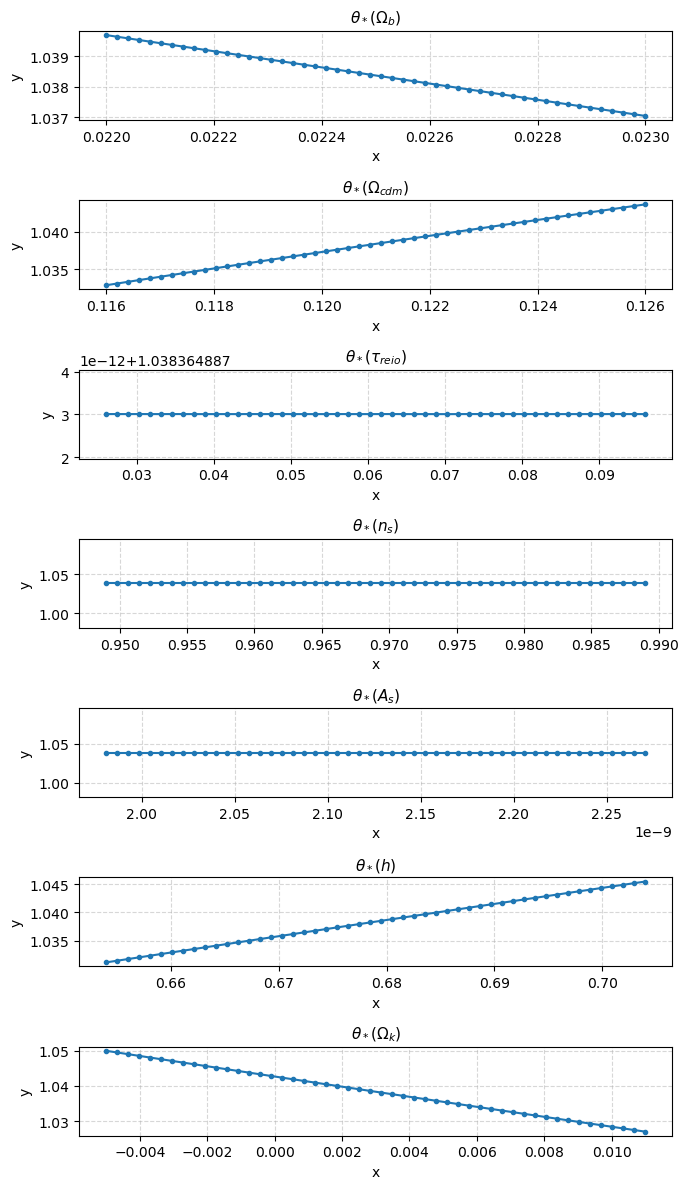

In [144]:
import pandas as pd

df1 = pd.read_csv('omega_b_theta_s5_N50.csv')
df2 = pd.read_csv('omega_cdm_theta_s5_N50.csv')
df3 = pd.read_csv('tau_reio_theta_s5_N50.csv')
df4 = pd.read_csv('n_s_theta_s5_N50.csv')
df5 = pd.read_csv('A_s_theta_s5_N50.csv')
df6 = pd.read_csv('h_theta_s5_N50.csv')
df7 = pd.read_csv('omega_k_theta_s4_N50.csv')

# Create figure and subplots (no shared x-axis)
fig, axes = plt.subplots(7, 1, figsize=(7, 12))

# List of (DataFrame, title)
datasets = [
    (df1, r'$\theta_*(\Omega_b)$'),
    (df2, r'$\theta_*(\Omega_{cdm})$'),
    (df3, r'$\theta_*(\tau_{reio})$'),
    (df4, r'$\theta_*(n_s)$'),
    (df5, r'$\theta_*(A_s)$'),
    (df6, r'$\theta_*(h)$'),
    (df7, r'$\theta_*(\Omega_{k})$')  
]

# Plot each dataset
for ax, (df, title) in zip(axes, datasets):
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o', markersize=3)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### Datasets 1v1 Shifted ($\Omega_b$, $\Omega_c$,  $\tau$ , $n_s$, $A_s$, $h$, $\Omega_k$;  $\theta_*$)

In [145]:
import copy

PLANCK2018_params_s1 = copy.deepcopy(PLANCK2018_params)
for i in range(0, len(PLANCK2018_params)):
    PLANCK2018_params_s1[i][1] = PLANCK2018_params[i][1] + PLANCK2018_params[i][2] 
PLANCK2018_params, PLANCK2018_params_s1

([['omega_b', 0.0225, 0.0001],
  ['omega_cdm', 0.121, 0.001],
  ['tau_reio', 0.061, 0.007],
  ['n_s', 0.969, 0.004],
  ['A_s', 2.1258e-09, 2.9e-11],
  ['h', 0.679, 0.005],
  ['Omega_k', 0.003, 0.002]],
 [['omega_b', 0.0226, 0.0001],
  ['omega_cdm', 0.122, 0.001],
  ['tau_reio', 0.068, 0.007],
  ['n_s', 0.973, 0.004],
  ['A_s', 2.1547999999999996e-09, 2.9e-11],
  ['h', 0.684, 0.005],
  ['Omega_k', 0.005, 0.002]])

In [ ]:
data_set_generator([1,0,0,0,0,0,0], 5, 50, PLANCK2018_params_s1, 'Shifted1s_')
data_set_generator([0,1,0,0,0,0,0], 5, 50, PLANCK2018_params_s1, 'Shifted1s_')
data_set_generator([0,0,1,0,0,0,0], 5, 50, PLANCK2018_params_s1, 'Shifted1s_')
data_set_generator([0,0,0,1,0,0,0], 5, 50, PLANCK2018_params_s1, 'Shifted1s_')
data_set_generator([0,0,0,0,1,0,0], 5, 50, PLANCK2018_params_s1, 'Shifted1s_')
data_set_generator([0,0,0,0,0,1,0], 5, 50, PLANCK2018_params_s1, 'Shifted1s_')
data_set_generator([0,0,0,0,0,0,1], 4, 50, PLANCK2018_params_s1, 'Shifted1s_')

Saved 50 rows to Shifted1s_omega_b_theta_s5_N50.csv
Saved 50 rows to Shifted1s_omega_cdm_theta_s5_N50.csv
Saved 50 rows to Shifted1s_tau_reio_theta_s5_N50.csv
Saved 50 rows to Shifted1s_n_s_theta_s5_N50.csv
Saved 50 rows to Shifted1s_A_s_theta_s5_N50.csv
Saved 50 rows to Shifted1s_h_theta_s5_N50.csv
Saved 50 rows to Shifted1s_Omega_k_theta_s5_N50.csv


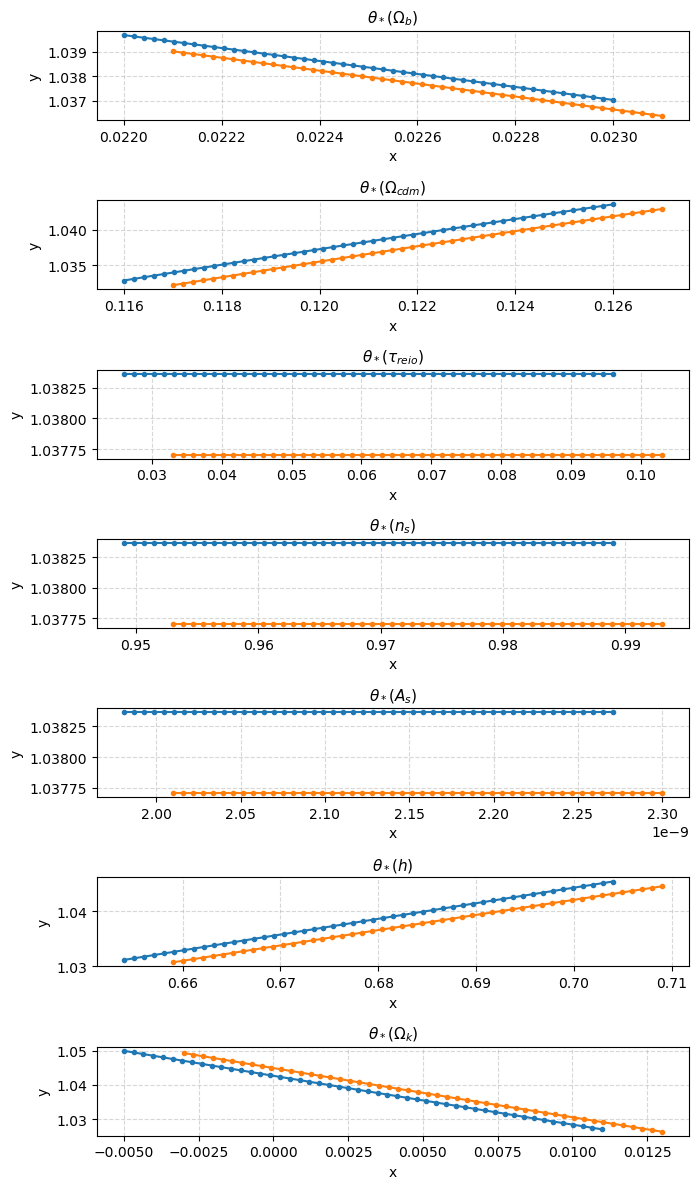

In [157]:
df1_s1 = pd.read_csv('Shifted1s_omega_b_theta_s5_N50.csv')
df2_s1 = pd.read_csv('Shifted1s_omega_cdm_theta_s5_N50.csv')
df3_s1 = pd.read_csv('Shifted1s_tau_reio_theta_s5_N50.csv')
df4_s1 = pd.read_csv('Shifted1s_n_s_theta_s5_N50.csv')
df5_s1 = pd.read_csv('Shifted1s_A_s_theta_s5_N50.csv')
df6_s1 = pd.read_csv('Shifted1s_h_theta_s5_N50.csv')
df7_s1 = pd.read_csv('Shifted1s_omega_k_theta_s4_N50.csv')

# Create figure and subplots (no shared x-axis)
fig, axes = plt.subplots(7, 1, figsize=(7, 12))

# List of (DataFrame, title)
datasets_s1 = [
    (df1_s1, r'$\theta_*(\Omega_b)$'),
    (df2_s1, r'$\theta_*(\Omega_{cdm})$'),
    (df3_s1, r'$\theta_*(\tau_{reio})$'),
    (df4_s1, r'$\theta_*(n_s)$'),
    (df5_s1, r'$\theta_*(A_s)$'),
    (df6_s1, r'$\theta_*(h)$'),
    (df7_s1, r'$\theta_*(\Omega_{k})$')  
]

# Plot each dataset
for ax, (df, title), (df2,title2) in zip(axes, datasets, datasets_s1):
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o', markersize=3)
    ax.plot(df2.iloc[:, 0], df2.iloc[:, 1], marker='o', markersize=3)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### Datasets 1v1 Shifted 3 ($\Omega_b$, $\Omega_c$,  $\tau$ , $n_s$, $A_s$, $h$, $\Omega_k$;  $\theta_*$)


In [9]:
import copy

PLANCK2018_params_s3 = copy.deepcopy(PLANCK2018_params)
for i in range(0, len(PLANCK2018_params)):
    PLANCK2018_params_s3[i][1] = PLANCK2018_params[i][1] + 3*PLANCK2018_params[i][2] 
PLANCK2018_params, PLANCK2018_params_s3

([['omega_b', 0.0224, 0.0001],
  ['omega_cdm', 0.12, 0.001],
  ['tau_reio', 0.054, 0.007],
  ['n_s', 0.965, 0.004],
  ['A_s', 2.0968e-09, 2.9e-11],
  ['h', 0.674, 0.005],
  ['Omega_k', 0.001, 0.002]],
 [['omega_b', 0.0227, 0.0001],
  ['omega_cdm', 0.123, 0.001],
  ['tau_reio', 0.075, 0.007],
  ['n_s', 0.977, 0.004],
  ['A_s', 2.1838e-09, 2.9e-11],
  ['h', 0.6890000000000001, 0.005],
  ['Omega_k', 0.007, 0.002]])

In [155]:
data_set_generator([1,0,0,0,0,0,0], 5, 50, PLANCK2018_params_s3, 'Shifted3s_')
data_set_generator([0,1,0,0,0,0,0], 5, 50, PLANCK2018_params_s3, 'Shifted3s_')
data_set_generator([0,0,1,0,0,0,0], 5, 50, PLANCK2018_params_s3, 'Shifted3s_')
data_set_generator([0,0,0,1,0,0,0], 5, 50, PLANCK2018_params_s3, 'Shifted3s_')
data_set_generator([0,0,0,0,1,0,0], 5, 50, PLANCK2018_params_s3, 'Shifted3s_')
data_set_generator([0,0,0,0,0,1,0], 5, 50, PLANCK2018_params_s3, 'Shifted3s_')
data_set_generator([0,0,0,0,0,0,1], 4, 50, PLANCK2018_params_s3, 'Shifted3s_')

Saved 50 rows to Shifted3s_omega_b_theta_s5_N50.csv
Saved 50 rows to Shifted3s_omega_cdm_theta_s5_N50.csv
Saved 50 rows to Shifted3s_tau_reio_theta_s5_N50.csv
Saved 50 rows to Shifted3s_n_s_theta_s5_N50.csv
Saved 50 rows to Shifted3s_A_s_theta_s5_N50.csv
Saved 50 rows to Shifted3s_h_theta_s5_N50.csv
Saved 50 rows to Shifted3s_Omega_k_theta_s4_N50.csv


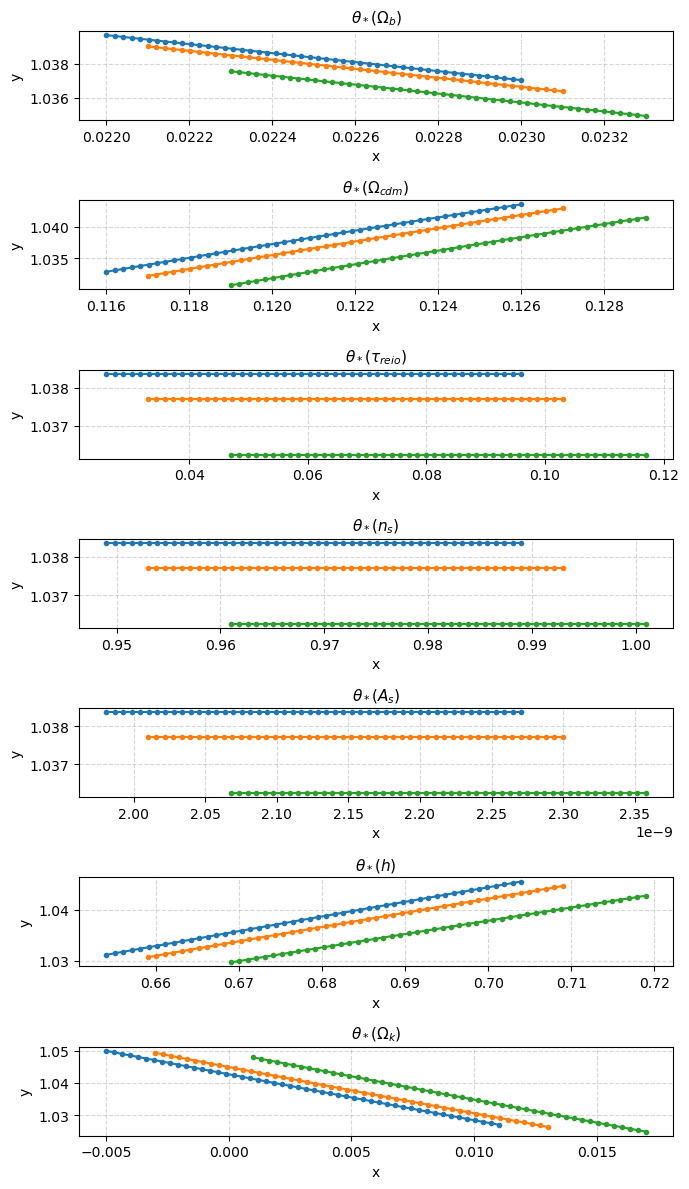

In [158]:
df1_s3 = pd.read_csv('Shifted3s_omega_b_theta_s5_N50.csv')
df2_s3 = pd.read_csv('Shifted3s_omega_cdm_theta_s5_N50.csv')
df3_s3 = pd.read_csv('Shifted3s_tau_reio_theta_s5_N50.csv')
df4_s3 = pd.read_csv('Shifted3s_n_s_theta_s5_N50.csv')
df5_s3 = pd.read_csv('Shifted3s_A_s_theta_s5_N50.csv')
df6_s3 = pd.read_csv('Shifted3s_h_theta_s5_N50.csv')
df7_s3 = pd.read_csv('Shifted3s_omega_k_theta_s4_N50.csv')

# Create figure and subplots (no shared x-axis)
fig, axes = plt.subplots(7, 1, figsize=(7, 12))

# List of (DataFrame, title)
datasets_s3 = [
    (df1_s3, r'$\theta_*(\Omega_b)$'),
    (df2_s3, r'$\theta_*(\Omega_{cdm})$'),
    (df3_s3, r'$\theta_*(\tau_{reio})$'),
    (df4_s3, r'$\theta_*(n_s)$'),
    (df5_s3, r'$\theta_*(A_s)$'),
    (df6_s3, r'$\theta_*(h)$'),
    (df7_s3, r'$\theta_*(\Omega_{k})$')  
]

# Plot each dataset
for ax, (df, title), (df2,title2), (df3, title3) in zip(axes, datasets, datasets_s1, datasets_s3):
    ax.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o', markersize=3)
    ax.plot(df2.iloc[:, 0], df2.iloc[:, 1], marker='o', markersize=3)
    ax.plot(df3.iloc[:, 0], df3.iloc[:, 1], marker='o', markersize=3)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:

PLANCK2018_params_s3 = copy.deepcopy(PLANCK2018_params)
for i in range(0, len(PLANCK2018_params)):
    PLANCK2018_params_s3[i][1] = PLANCK2018_params[i][1] + 3*PLANCK2018_params[i][2] 
PLANCK2018_params, PLANCK2018_params_s3

NameError: name 'PLANCK2018_params' is not defined